---
title:  "Neuralnet "
excerpt: "Basic Neural Net using numpy,tensor-flow,keras"

categories:
  - Deep-Learning
tags:
  - DL
  - Neuralnet Using keras
  - KEARS 창시자에게 배우는 딥러닝
  - 딥러닝
last_modified_at: 2020-02-22T13:06:00-05:00
---

KEARS 창시자에게 배우는 딥러닝 - 2장
> Basic 1 에서, 계산그래프를 통한, deep-learning 기초를 numpy로 활용했다면, 여기서는 kears 를 이용한 기본을 짚고 넘어간다.  
> [책 관련 Blog 로 이동](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EC%B0%BD%EC%8B%9C%EC%9E%90%EC%97%90%EA%B2%8C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D/)

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("train_images.shape",train_images.shape)
print("train_labels.shape",train_labels.shape)
print("test_images.shape",test_images.shape)
print("test_labels",test_labels.shape)

train_images.shape (60000, 28, 28)
train_labels.shape (60000,)
test_images.shape (10000, 28, 28)
test_labels (10000,)


In [4]:
import matplotlib.pyplot as plt

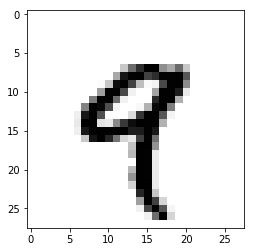

In [5]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary) ## cmap 은 plt 에서, 사용하는 객체인데, 여기서는 흑백이미지이니, cm.binary 를 사용한다.
plt.show()

In [6]:
28*28

784

KERAS 에서는 models 중 Sequential 를 사용하거나, 함수 API 형으로 구성할 수 있는데, sequatial 이 일반적인 network를 다룰때 편리한 클래스라면, API형식으로 network 를 자기 마음데로 이른바 고급과정이라 볼 수 있다  

신경망의 핵심적인 구조는 "층"(layer)이라 할수있다. 

In [7]:
from keras import models
from keras import layers

network = models.Sequential()

## 첫번째 layer는 784인 2d 텐서만 입력으로 받는 층이다
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) ## 28*28=784 이고 (784,) 을 넘긴다. 근데, 784 이면, 1D tensor 아닌가? 생각을 계속품었었다.

## 이는 배치차원인 0번째 축 (sample갯수가 들어오는 자리) 를 입력하지 않아야, 어떤 배치 크기도 입력으로 받을 수 있기 때문이다.
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


모델을 컴파일 해줘야, newwork  class가 생긴다.

In [8]:
network.compile(optimizer='rmsprop', ## 유명한 gradient decent 라고 생각하면 된다.
                loss='categorical_crossentropy', ## 다중 분류문제에서, 가장 많이 사용하는 손실함수
                metrics=['accuracy'])

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정합니다. 예를 들어, 앞서 우리의 훈련 이미지는 `[0, 255]` 사이의 값인 `uint8` 타입의 `(60000, 28, 28)` 크기를 가진 배열로 저장되어 있습니다. 이 데이터를 0과 1 사이의 값을 가지는 `float32` 타입의 `(60000, 28 * 28)` 크기의 배열로 바꿉니다.

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [10]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
## one-hotencoding 으로 변환된것을 확인할 수 있다.
train_labels[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
train_images.shape[0]/128 ## 60000만개를 

468.75

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128) ## 학습시작. epochs=5 는 전체사이즈 데이터를 5번 즉, 6만*5 30만번 사용하겠다는 것이며, 1epoch 안에서는 468번 가중치 갱신이 일어난다.

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2594 - acc: 0.9244
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.1037 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0679 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0494 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0370 - acc: 0.9888


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 22us/step


In [15]:
print('test_acc:', test_acc)

test_acc: 0.978


test 셋의 결과과 좋다. 물론 과적합 문제가 있지만, 이는 나중에 다른다.  
basic 01 때보다, 좋은 것은 basic 01 은 가중치 초기값이라든지, layer 내의 hidden node 갯수가 다른영향도 있다. 나중에 수정버전을 다룬다.

#### 함수형 API 를 사용하는 방법

In [16]:
## Sequential 사용
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

In [17]:
## 함수형 API 사용 01
input_tensor = layers.Input(shape=(784,))
print(type(input_tensor))
x = layers.Dense(32,activation='relu')(input_tensor)
print(type(x))
output_tensor = layers.Dense(10,activation='softmax')(x)
print(type(output_tensor))

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


In [18]:
## 함수형 API 사용 02
model = models.Model(inputs=input_tensor,outputs=output_tensor)

이제는 함수처럼 model api를 사용할수있다.